### Importing libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

### Reading the file and plotting all the points

<function matplotlib.pyplot.show(*args, **kw)>

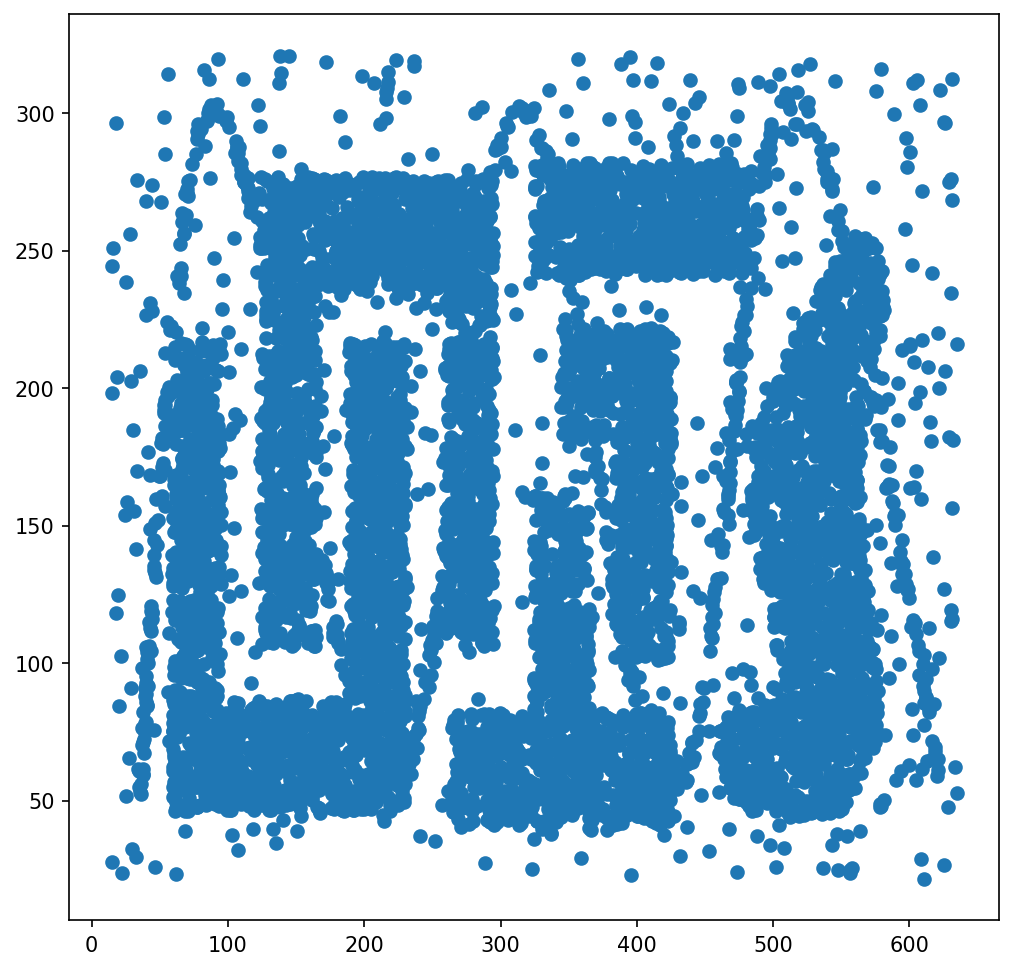

In [2]:
points = pd.read_csv('chameleon_clusters.txt')
x = (points.x)
y = (points.y)
plt.figure(figsize=(8,8), dpi= 150)
plt.scatter(x, y)
plt.show

In [4]:
kmax = 20
xk = np.arange(0, kmax, 1)
yk = np.zeros(kmax)
for i in xk:
    if i != 0:
        kmeans = KMeans(n_clusters=i, max_iter = 100).fit(points)
        yk[i] = kmeans.inertia_

<function matplotlib.pyplot.show(*args, **kw)>

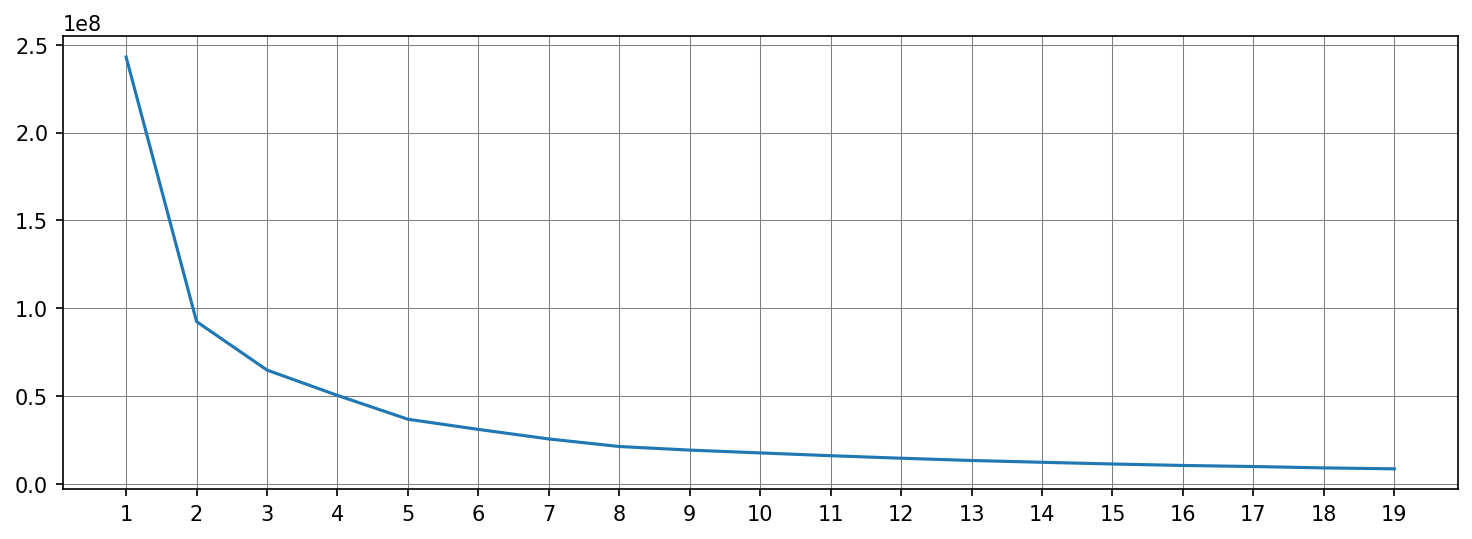

In [5]:
plt.figure(figsize=(12,4), dpi= 150)
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.xticks(xk)
plt.plot(xk[1:kmax], yk[1:kmax])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

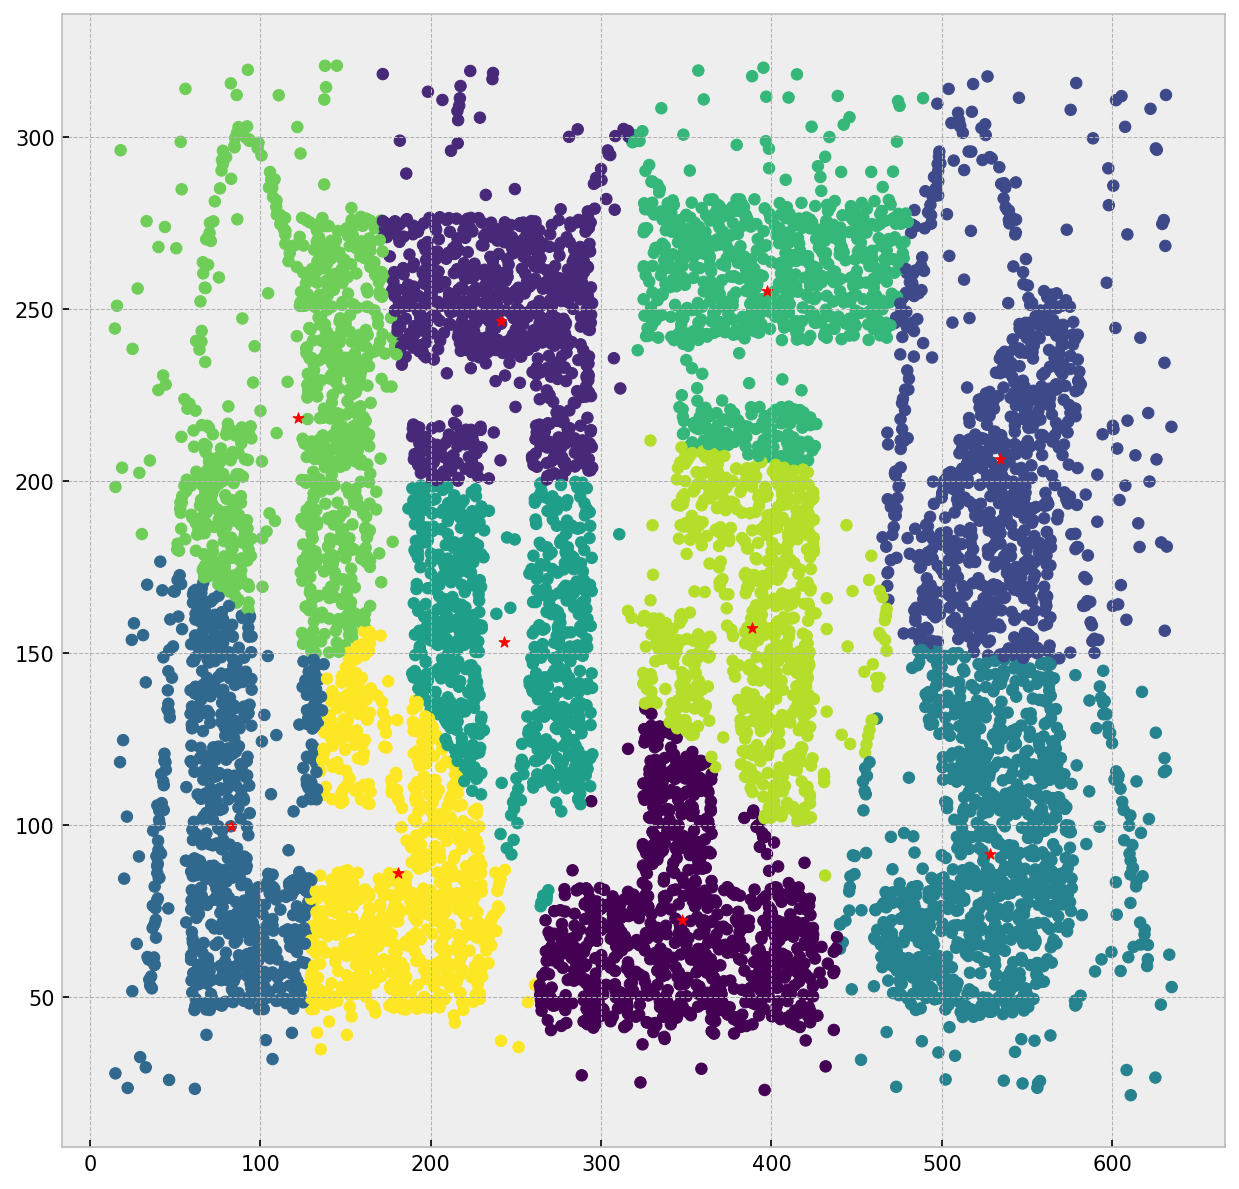

In [7]:
k = 10
kmeans = KMeans(n_clusters=k, max_iter=100).fit(points)
centroids = kmeans.cluster_centers_
plt.style.use('bmh')
plt.figure(figsize=(10, 10), dpi= 150)
plt.scatter(x, y, c=kmeans.labels_.astype(float), s=30)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s =30, marker='*')
plt.show

### Evaluating clustering performance

In [16]:
samples = silhouette_samples(points, kmeans.labels_)
n = len(samples)
good =len(samples[np.where(samples > 0.6)])
print(n, good, (good/n)*100)

8000 901 11.262500000000001


In [11]:
scores = silhouette_score(points, kmeans.labels_)
scores

0.39161154506804763